# Zomato Data Analysis Using Python

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("Zomato data .csv")
df.sample(5)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
127,Ruchi Maayaka,No,No,3.3/5,8,100,Dining
147,Vijayalakshmi,Yes,No,3.9/5,47,200,Dining
98,Chatar Patar,No,No,3.7/5,65,300,Dining
70,The Good Bowl,Yes,No,3.6/5,6,500,Dining
79,Upahar Sagar,No,No,3.8/5,39,350,Dining


In [3]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


## Converting rate column to float and removing the denominator

In [5]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [38]:
rating_distribution = df['rate'].describe()
cost_distribution = df['approx_cost(for two people)'].describe()
online_order_rating = df.groupby('online_order')['rate'].mean()
book_table_rating = df.groupby('book_table')['rate'].mean()

## type of restaurant 

Text(0.5, 0, 'Types of Restaurant')

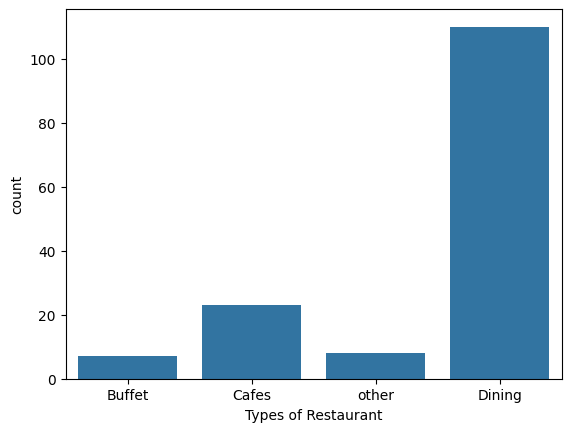

In [6]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("Types of Restaurant")

In [7]:
# As we can see majority of the restaurant falls in Dining category

Text(0, 0.5, 'Votes')

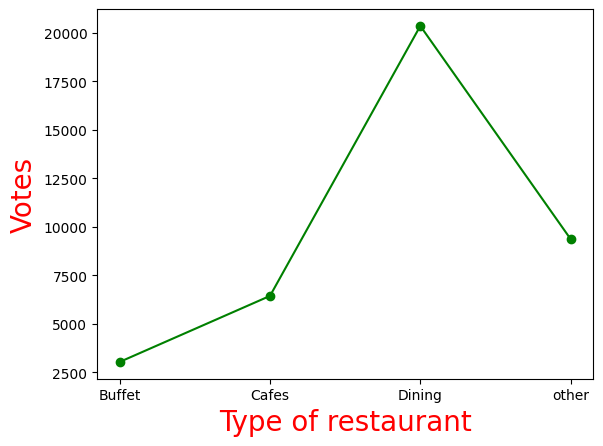

In [8]:
# Let's see which type of restaurants have the most votes
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel("Type of restaurant",c='red',size=20)
plt.ylabel("Votes",c='red',size=20)

### The line graph shows that Dining got the most votes thus preferred by most of the individuals

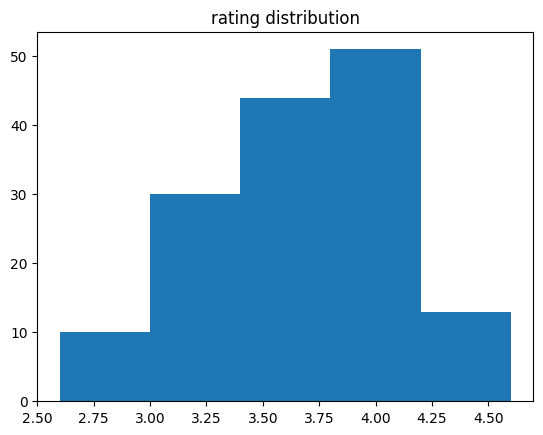

In [9]:
plt.hist(df['rate'],bins=5)
plt.title("rating distribution")
plt.show()

### Most of restaurants got rating between 3.5 to 412.5

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

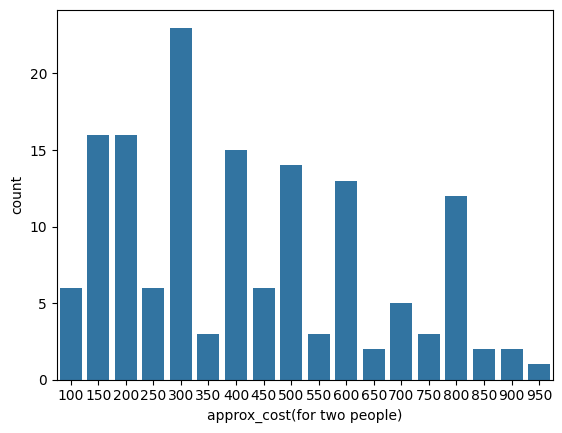

In [10]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Majority of couples preferred restaurant with approx cost of 300RS

<Axes: xlabel='online_order', ylabel='rate'>

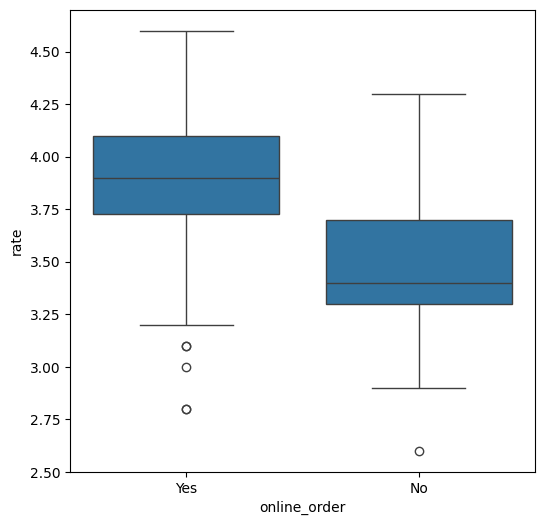

In [11]:
# Lets see which type of order wheter online or offline recieved highest rating 
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate', data=df)

### offline orders recieved lower rating as compared to online orders

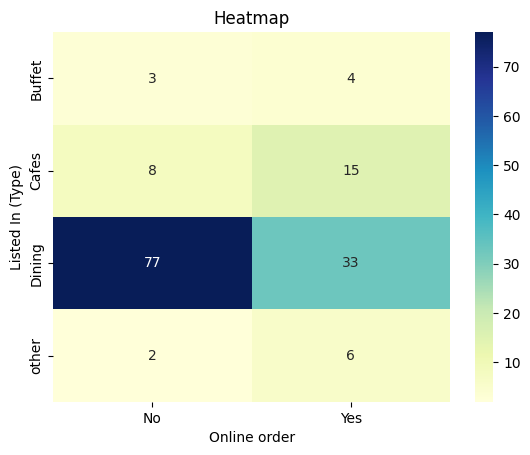

In [12]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu',fmt='d')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed In (Type)")
plt.show()

### Dining restaurants primarily accept offline orders, whereas cafes primarily accept online orders. This suggest clients like to place order in person at restaurants, but prefer online ordering at cafes

## lets do some more Analysis 

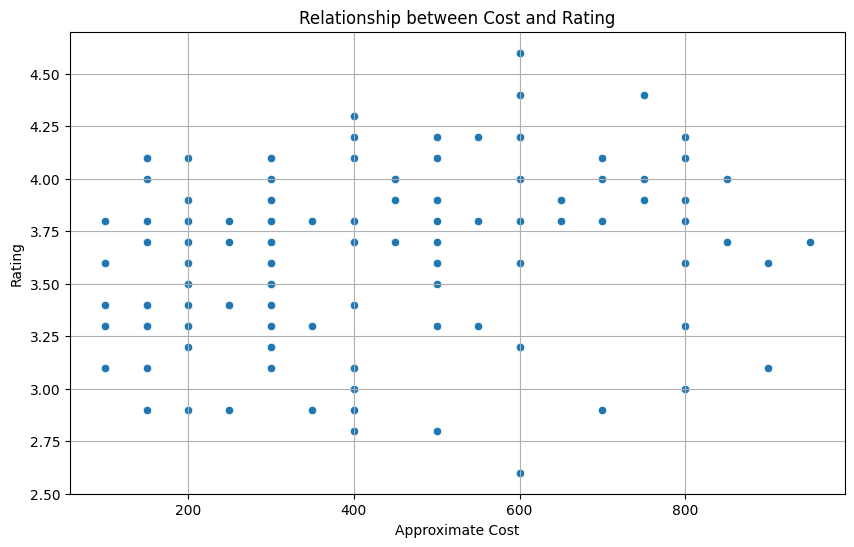

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title('Relationship between Cost and Rating')
plt.xlabel('Approximate Cost')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

### Relationship between Cost and Votes

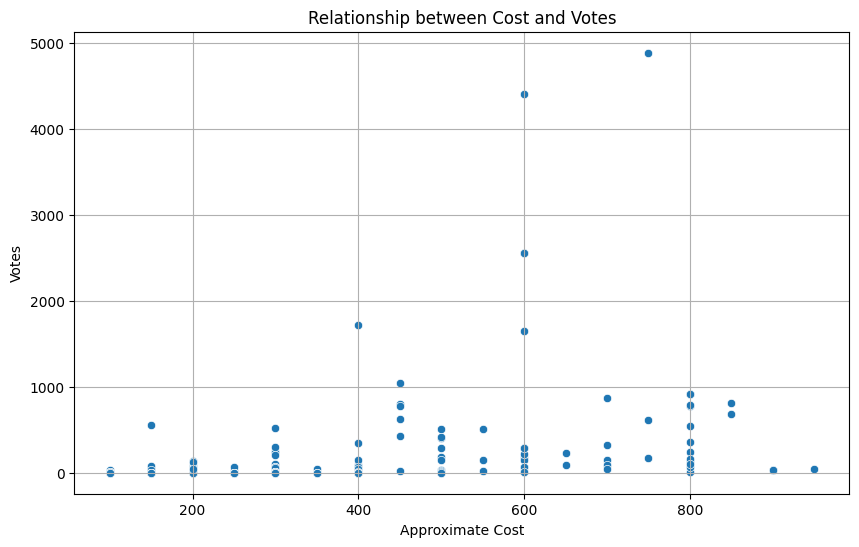

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=df)
plt.title('Relationship between Cost and Votes')
plt.xlabel('Approximate Cost')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

## 1. Rating Analysis

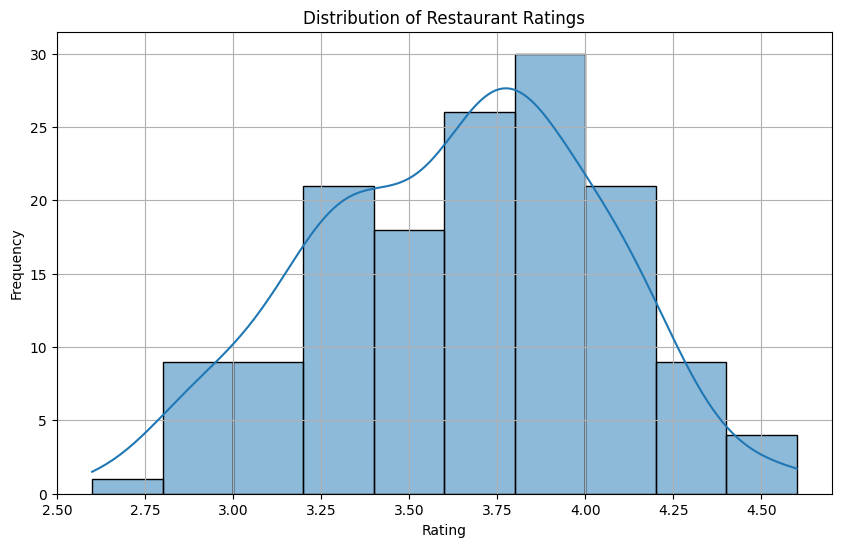

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df['rate'], bins=10, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Rating Distribution: The average rating of restaurants is approximately 3.63, with most ratings falling between 3.3 and 3.9. The highest rating observed is 4.6, and the lowest is 2.6.

## 2. Cost Analysis

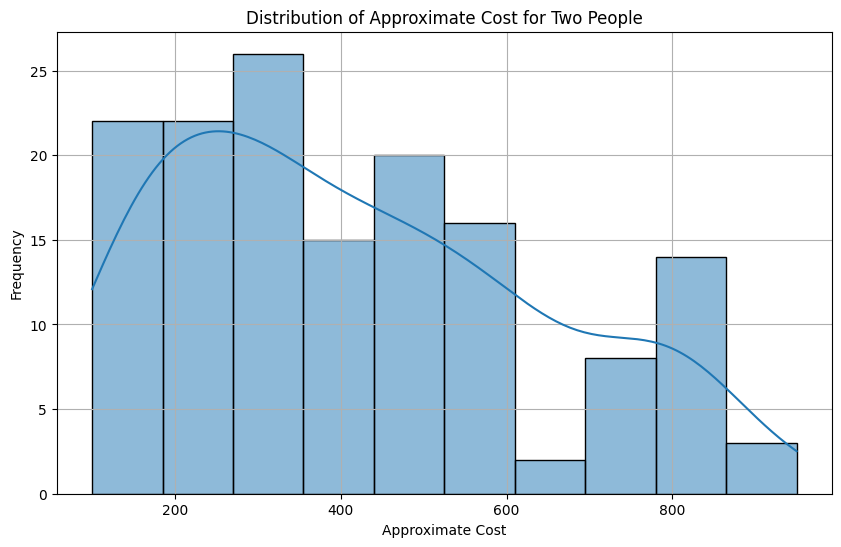

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df['approx_cost(for two people)'], bins=10, kde=True)
plt.title('Distribution of Approximate Cost for Two People')
plt.xlabel('Approximate Cost')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Cost Distribution: The average cost for two people is around ₹418, with a range from ₹100 to ₹950. Most restaurants have a cost between ₹200 and ₹600.

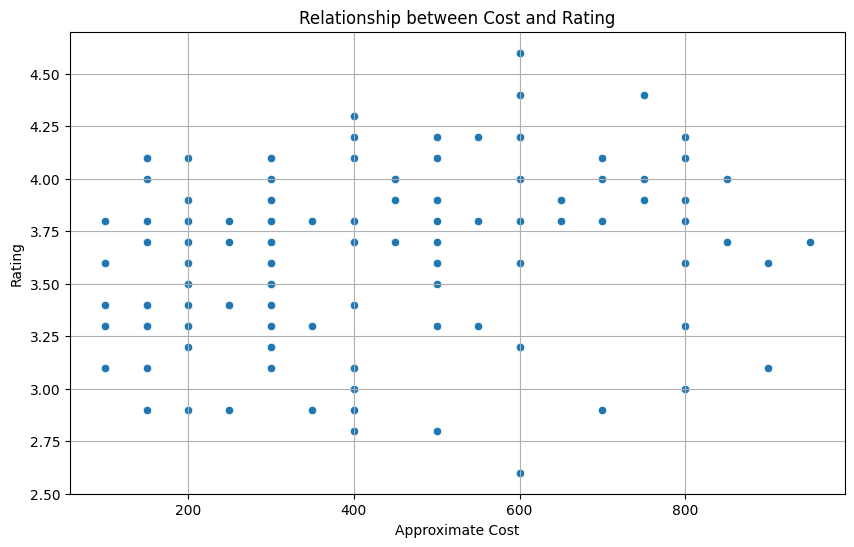

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='rate', data=df)
plt.title('Relationship between Cost and Rating')
plt.xlabel('Approximate Cost')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

### Cost vs. Rating: There is a slight positive correlation between cost and rating, indicating that more expensive restaurants tend to have slightly higher ratings.

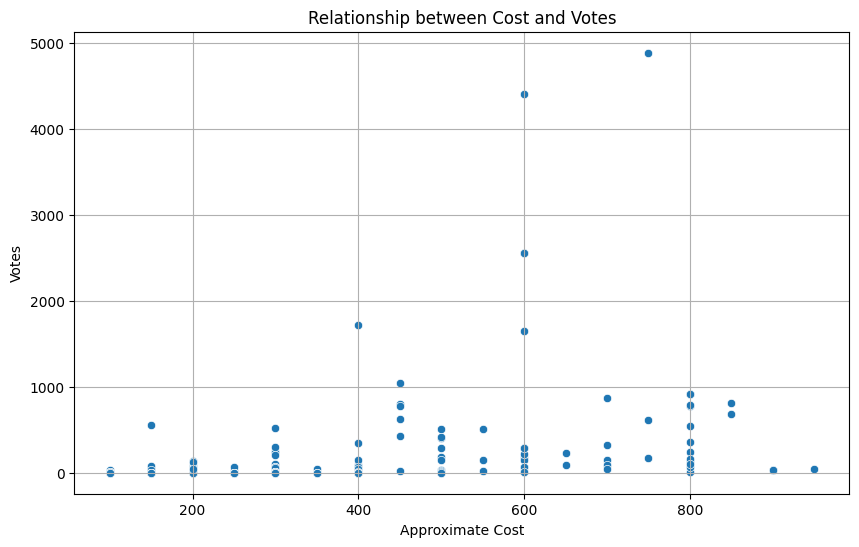

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='approx_cost(for two people)', y='votes', data=df)
plt.title('Relationship between Cost and Votes')
plt.xlabel('Approximate Cost')
plt.ylabel('Votes')
plt.grid(True)
plt.show()

### Cost vs. Votes: A similar pattern is observed between cost and votes, suggesting that higher-cost restaurants might attract more customers or have more engaged customers.

## 3. Online Orders and Table Bookings Analysis

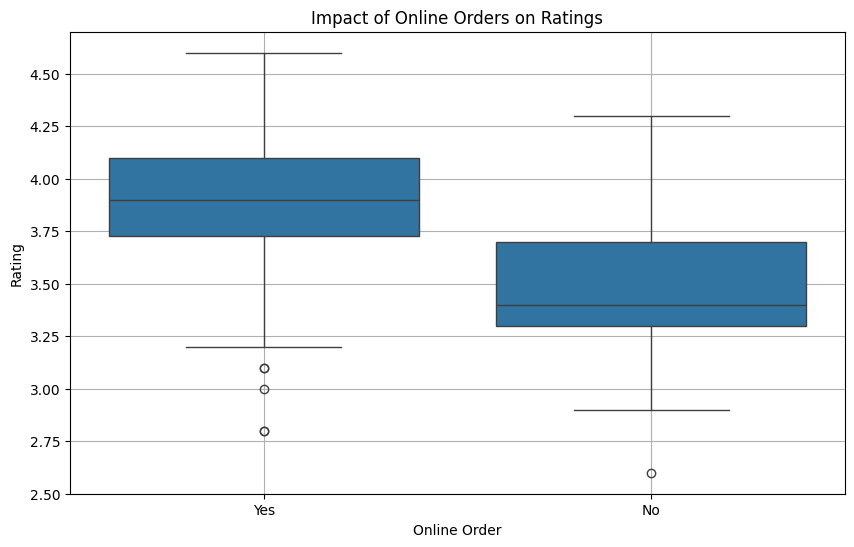

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.title('Impact of Online Orders on Ratings')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

### Impact of Online Orders: Restaurants that offer online orders have a higher average rating (3.86) compared to those that don't (3.49).

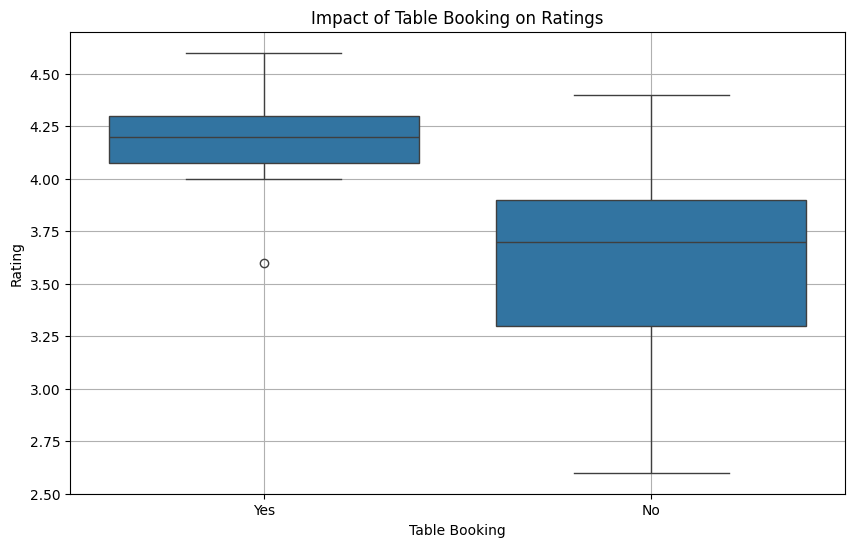

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='book_table', y='rate', data=df)
plt.title('Impact of Table Booking on Ratings')
plt.xlabel('Table Booking')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

### Impact of Table Bookings: Restaurants that offer table bookings have an even higher average rating (4.19) compared to those that don't (3.60).

## 4. Category-wise Analysis

In [26]:
# Grouping by type of listing and calculating the average rating, cost, and votes
category_analysis = df.groupby('listed_in(type)').agg({
    'rate': 'mean',
    'approx_cost(for two people)': 'mean',
    'votes': 'mean'
}).reset_index()

In [27]:
category_analysis

,listed_in(type),rate,approx_cost(for two people),votes
0,Buffet,3.842857,671.428571,432.571429
1,Cafes,3.765217,545.652174,279.739130
2,Dining,3.571818,357.272727,185.118182
3,other,3.912500,668.750000,1170.875000


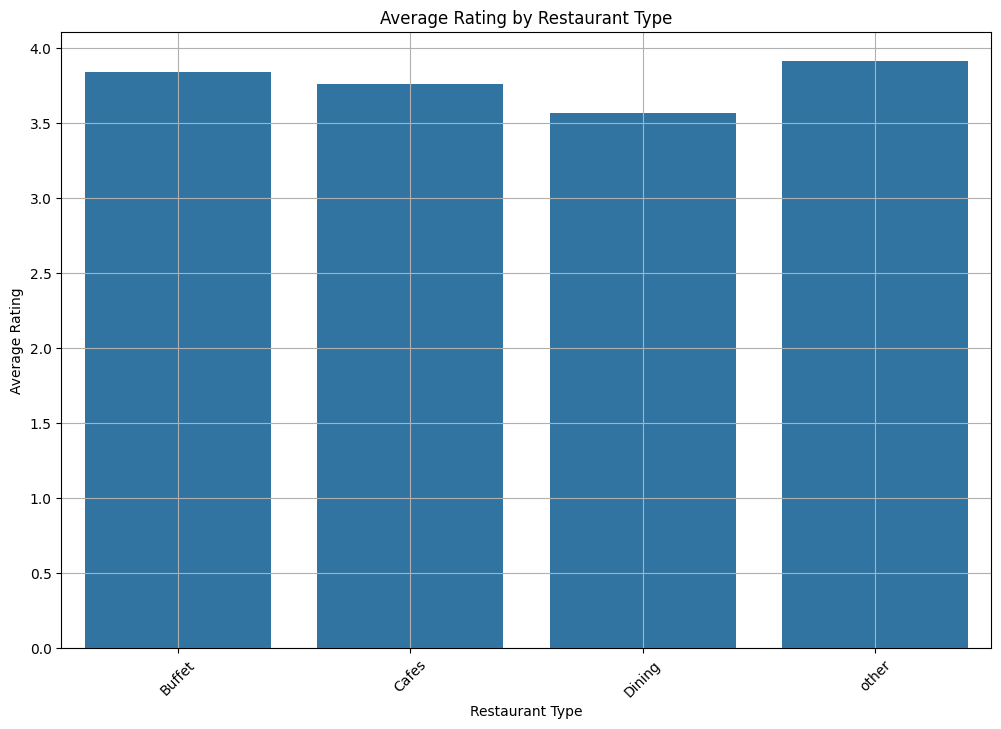

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='listed_in(type)', y='rate', data=category_analysis)
plt.title('Average Rating by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

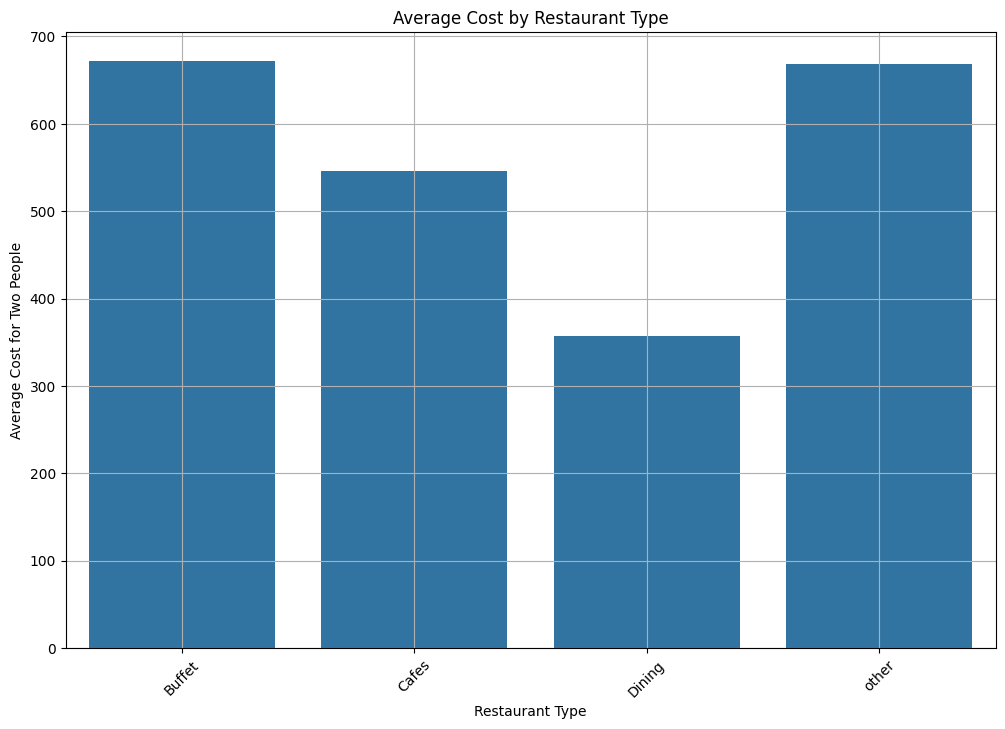

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='listed_in(type)', y='approx_cost(for two people)', data=category_analysis)
plt.title('Average Cost by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Cost for Two People')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

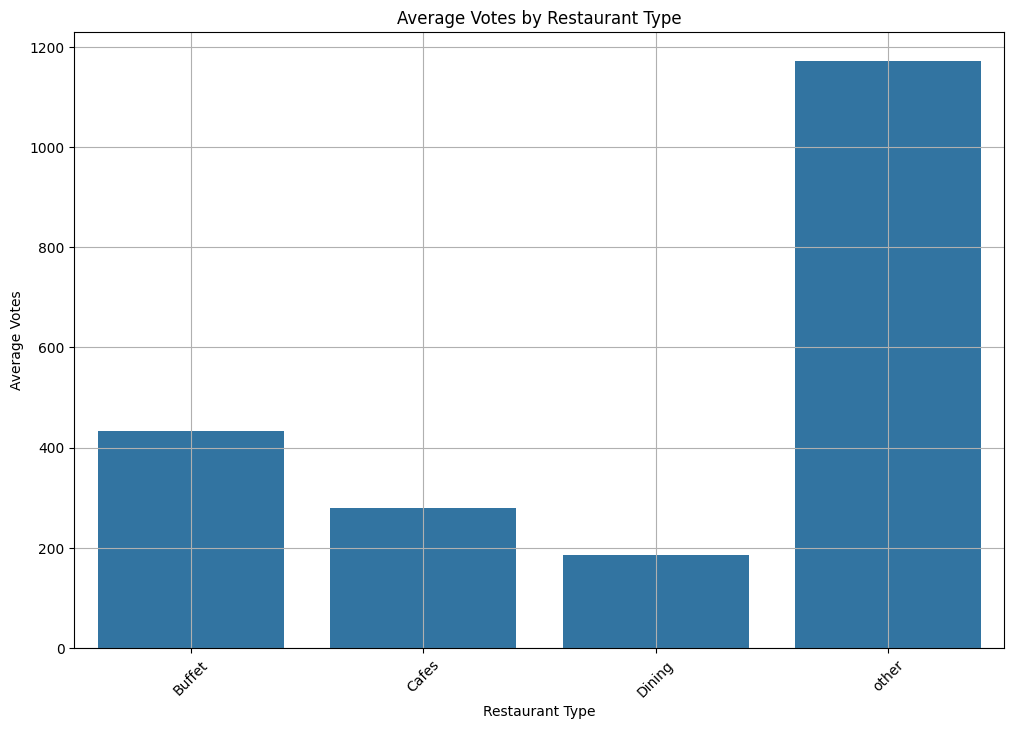

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='listed_in(type)', y='votes', data=category_analysis)
plt.title('Average Votes by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Average Votes')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Dining: Dining options have a slightly lower average rating (3.57) and are more affordable, with an average cost of ₹357.

### Buffet: Restaurants listed under "Buffet" have the highest average rating (3.84) and the highest average cost for two people (₹671). They also have a decent average vote count.

### Other Categories: The "other" category shows the highest average votes (1170.88), indicating a diverse and popular category.

### Cafes: Cafes also have a relatively high average rating (3.77) and cost (₹546), with moderate votes.

## 5. Correlation Analysis

In [32]:
correlation_matrix = df[['rate', 'votes', 'approx_cost(for two people)']].corr()
correlation_matrix

,rate,votes,approx_cost(for two people)
rate,1.000000,0.489844,0.275216
votes,0.489844,1.000000,0.324372
approx_cost(for two people),0.275216,0.324372,1.000000


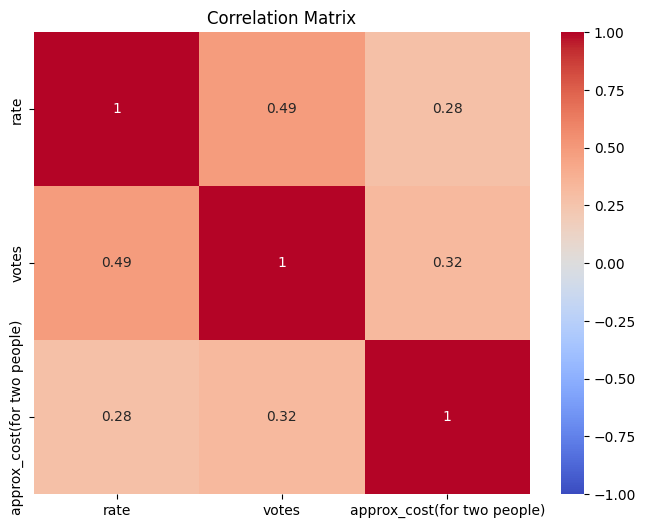

(count    148.000000
 mean       3.633108
 std        0.402271
 min        2.600000
 25%        3.300000
 50%        3.700000
 75%        3.900000
 max        4.600000
 Name: rate, dtype: float64,
 count    148.000000
 mean     418.243243
 std      223.085098
 min      100.000000
 25%      200.000000
 50%      400.000000
 75%      600.000000
 max      950.000000
 Name: approx_cost(for two people), dtype: float64,
 online_order
 No     3.487778
 Yes    3.858621
 Name: rate, dtype: float64,
 book_table
 No     3.601429
 Yes    4.187500
 Name: rate, dtype: float64,
   listed_in(type)      rate  approx_cost(for two people)        votes
 0          Buffet  3.842857                   671.428571   432.571429
 1           Cafes  3.765217                   545.652174   279.739130
 2          Dining  3.571818                   357.272727   185.118182
 3           other  3.912500                   668.750000  1170.875000,
                                  rate     votes  approx_cost(for two peopl

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

rating_distribution, cost_distribution, online_order_rating, book_table_rating, category_analysis, correlation_matrix

### Rating and Votes: A moderate positive correlation (0.49) exists between ratings and votes, suggesting that restaurants with higher ratings tend to receive more votes.
### Cost and Rating: A weak positive correlation (0.28) is observed between cost and rating, implying that costlier restaurants might be slightly better rated.
### Cost and Votes: There's also a weak positive correlation (0.32) between cost and votes, indicating that costlier restaurants may attract more votes.

## Conclusions

### Focus on Online Orders and Table Bookings: Restaurants can potentially improve their ratings by offering online orders and table bookings.
### Cost Optimization: Since there is a weak correlation between cost and rating, pricing strategies should balance affordability and perceived value.
### Targeted Marketing: Use insights from the "Buffet" and "Cafes" categories to target specific customer segments.